In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
from datetime import datetime, timedelta
import seaborn as sns

import datetime
from dateutil.parser import parse

import numpy as np


from matplotlib import rcParams

plt.rcParams["figure.figsize"] = (20,10)
# %reset

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
import glob

all_files = glob.glob("./Duo_Auth*.csv")

li = []

for filename in all_files:
#     print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)

C:\Users\Francisco\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df['Timestamp (UTC)'] = pd.to_datetime(df['Timestamp (UTC)'])
df['date'] = df['Timestamp (UTC)'].apply(lambda timestamp: timestamp.date())
df['month'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.month)
df['hour'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.hour)
df['minute'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.minute)
df['second'] = df['Timestamp (UTC)'].apply(lambda timestamp:  timestamp.second)

In [ ]:
logs = df
print(logs.shape)
logs.head(2)

In [ ]:
users = pd.read_csv('duo_users_clean.csv')
users['Created'] = users['Created'].apply(lambda date: parse(date))
users.head()

In [ ]:
mask1 = users["Description"] == "Active (Student)"
mask2 = users["Description"] == "Active (Faculty)"
mask3 = users["Description"] == "Active (Staff)"

In [ ]:
subsetOfUsers = users[(mask1) | (mask2) | (mask3)]
subsetOfUsers.Description.value_counts()

In [ ]:
typeOfUsers = subsetOfUsers.set_index("Alias")["Description"].to_dict()

In [ ]:
logs = logs[logs['Alias'].isin(typeOfUsers)]

In [ ]:
logs['Description'] = logs.Alias.apply(lambda alias: typeOfUsers[alias])

In [ ]:
# Get a list of active students, faculty, and staff that have logged in
activeUsers = logs.Alias.unique()

In [ ]:
subsetOfUsers = subsetOfUsers[subsetOfUsers['Alias'].isin(activeUsers)]
len(subsetOfUsers)

In [ ]:
subsetOfUsers.Description.value_counts()

In [ ]:
# have to run up to list line when starting

In [15]:
# Users Created after november
usersCreatedAfterNovember = subsetOfUsers[subsetOfUsers['Created']>'2020-11-01']
usersCreatedAfterNovember.shape

(1029, 14)

In [16]:
typeOfUsersAfterNovember = usersCreatedAfterNovember.set_index("Alias")["Description"].to_dict()

In [17]:
enrollmentAnlysisLogs = logs[logs['Alias'].isin(typeOfUsersAfterNovember)]

In [18]:
enrollmentAnlysisLogs = enrollmentAnlysisLogs[enrollmentAnlysisLogs['Reason']!='Remembered device']

In [19]:
enrollmentAnlysisLogs.set_index('Alias', inplace=True)

In [20]:
def addToDataFrame(data):
    df_length = len(userEnrollmentLogs)
    userEnrollmentLogs.loc[df_length] = data

In [21]:
userEnrollmentLogs = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10'])
# success and failure data

# users who have authenticated at least 10 times
usersWithTenAuth = []

for user in usersCreatedAfterNovember.Alias:
    array = []
    counter = 0
    errorRate = 0
    failures = 0
    if(len(enrollmentAnlysisLogs.loc[user]['Result'])<10):
        continue
    usersWithTenAuth.append(user)
    for i in enrollmentAnlysisLogs.loc[user]['Result']:
        counter += 1
        array.append(i)
        if(counter==10):
            break
#     print(enrollmentAnlysisLogs.loc[user].Description)
    addToDataFrame(array)

In [22]:
userEnrollmentLogs.shape

(766, 10)

In [23]:
userEnrollmentLogs.head()

,1,2,3,4,5,6,7,8,9,10
0,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS
1,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,FAILURE,SUCCESS,SUCCESS,SUCCESS,SUCCESS
2,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS
3,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,FAILURE,FAILURE
4,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS,SUCCESS


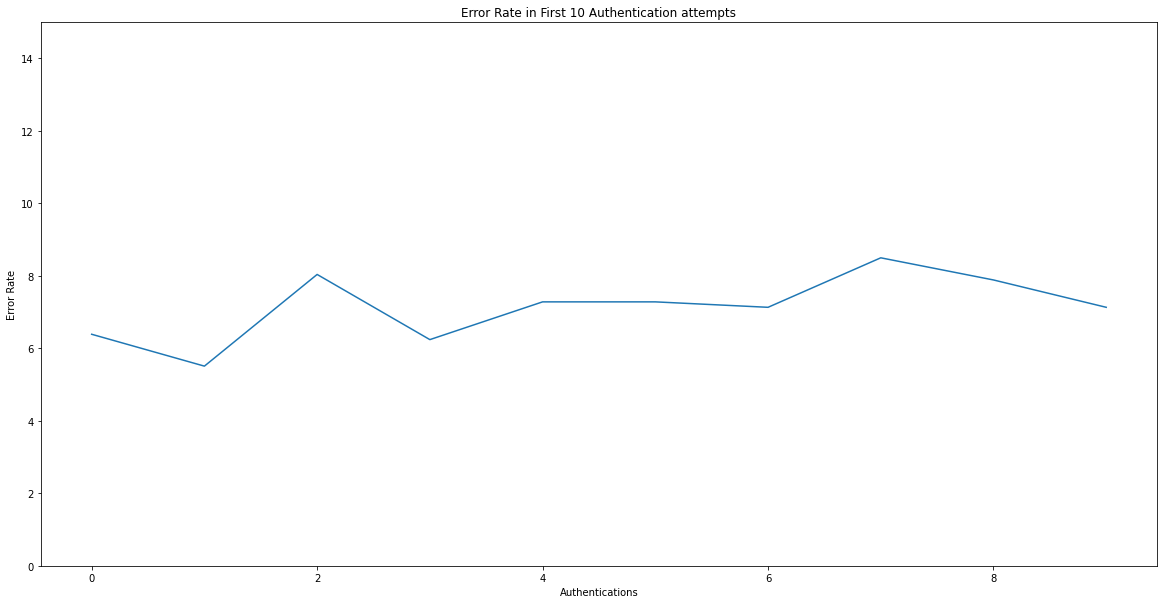

In [24]:
successVsfailureEnrollmentLogs = []
for i in range(1,11):
    value = (userEnrollmentLogs[[str(i)]].value_counts()[1] / userEnrollmentLogs[[str(i)]].value_counts()[0])*100
    successVsfailureEnrollmentLogs.append(value)
plt.ylim(0,15)
plt.title('Error Rate in First 10 Authentication attempts')
plt.ylabel('Error Rate')
plt.xlabel('Authentications')
# plt.xticks([2,3,4,5,6,7,8,9,10])
plt.plot(successVsfailureEnrollmentLogs)

plt.show()
plt.rcParams["figure.figsize"] = (20,10)
# print(successVsfailureEnrollmentLogs)

In [25]:
# Success Rate by month

In [26]:
users_logs_by_month = logs[logs['month']!=5][["month","Result","Reason"]].groupby(["month","Result"]).count()

In [27]:
users_logs_by_month.head()

Reason
month Result         
1     FAILURE   52240
      FRAUD        17
      SUCCESS  877108
2     FAILURE   47489
      FRAUD        18

In [28]:
ax = users_logs_by_month.unstack(level=1)
ax.columns = ax.columns.droplevel()
ax.drop(columns=['FRAUD'], inplace=True)

In [29]:
ax['success_percent'] = round((ax['SUCCESS'] / (ax['SUCCESS'] + ax['FAILURE'])),2)
ax['failure_percent'] = round((ax['FAILURE'] / (ax['SUCCESS'] + ax['FAILURE'])),2)

In [30]:
ax

Result,FAILURE,SUCCESS,success_percent,failure_percent
month,,,,
1,52240,877108,0.94,0.06
2,47489,1064246,0.96,0.04
3,41964,936941,0.96,0.04
4,46608,1075649,0.96,0.04
11,57298,1058468,0.95,0.05
12,42738,805198,0.95,0.05


In [31]:
new_index = [11,12,1,2,3,4]
ax = ax.reindex(new_index)

In [32]:
ax = ax.rename(index={11: 'November', 12: 'December', 1: 'January', 2: 'February', 3: 'March', 4: 'April'})

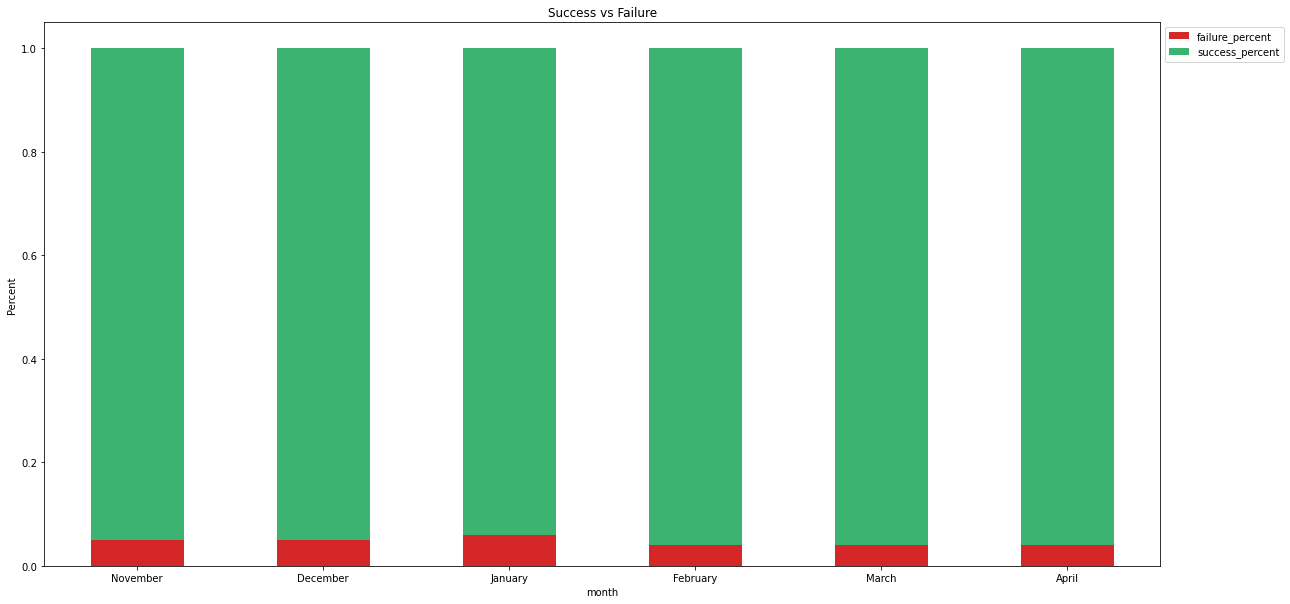

In [33]:
# ax[['failure_percent','success_percent']].plot.bar(stacked=True, rot=0)
ax[['failure_percent','success_percent']].plot.bar(stacked=True, rot=0, color=['tab:red','mediumseagreen'])
# ax[['FAILURE','SUCCESS']].plot(rot=0, color=['tab:red','mediumseagreen'])
plt.title('Success vs Failure')
plt.ylabel('Percent')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [297]:
november = logs[(logs['month']==11) & (logs['Result']=='FAILURE')]['Alias'].unique()
november.shape

(17629,)

In [298]:
december = logs[(logs['month']==12) & (logs['Result']=='FAILURE')]['Alias'].unique()
december.shape

(15312,)

In [299]:
january = logs[(logs['month']==1) & (logs['Result']=='FAILURE')]['Alias'].unique()
january.shape

(16375,)

In [300]:
febuary = logs[(logs['month']==2) & (logs['Result']=='FAILURE')]['Alias'].unique()
febuary.shape

(15993,)

In [301]:
march = logs[(logs['month']==3) & (logs['Result']=='FAILURE')]['Alias'].unique()
march.shape

(14664,)

In [302]:
april = logs[(logs['month']==4) & (logs['Result']=='FAILURE')]['Alias'].unique()
april.shape

(15697,)

In [303]:
reocurringErrorsDec = len(set(november) & set(december))

In [304]:
reocurringErrorsJan = len((set(november) & set(january)) | 
                        (set(december) & set(january)))

In [305]:
reocurringErrorsFeb = len((set(november) & set(febuary)) | 
                        (set(december) & set(febuary)) |
                        (set(january) & set(febuary)) 
                        )

In [306]:
reocurringErrorsMarch = len((set(november) & set(march)) | 
                        (set(december) & set(march)) |
                        (set(january) & set(march)) |
                        (set(febuary) & set(march)) 
                        )

In [307]:
reocurringErrorsApril = len((set(november) & set(april)) | 
                        (set(december) & set(april)) |
                        (set(january) & set(april)) |
                        (set(febuary) & set(april)) |
                        (set(march) & set(april))
                        )

In [314]:
reocurringErrorUsers = [reocurringErrorsDec,reocurringErrorsJan, reocurringErrorsFeb, reocurringErrorsMarch, reocurringErrorsApril]

In [319]:
usersWhoHaveMadeErrors = [len(december),len(january),len(febuary),len(march),len(april)]

In [340]:
# consecutive users

In [329]:
decConsecutiveErrors = len(set(november) & set(december))

In [330]:
janConsecutiveErrors = len(set(november) & set(december) & set(january))

In [331]:
febConsecutiveErrors = len(set(november) & set(december) & set(january) & set(febuary))

In [332]:
marchConsecutiveErrors = len(set(november) & set(december) & set(january) & set(febuary) & set(march))

In [333]:
aprilConsecutiveErrors = len(set(november) & set(december) & set(january) & set(febuary) & set(march) & set(april))

In [334]:
usersWithConsecutiveErrors = [decConsecutiveErrors, janConsecutiveErrors, febConsecutiveErrors, marchConsecutiveErrors, aprilConsecutiveErrors]

In [335]:
usersWithConsecutiveErrors

[9774, 6282, 4438, 3268, 2622]

In [361]:
UserErrors = pd.DataFrame(list(zip(reocurringErrorUsers, usersWithConsecutiveErrors, usersWhoHaveMadeErrors)), columns=['pastUsers','consecutiveUsers','totalUsers'])
UserErrors

,pastUsers,consecutiveUsers,totalUsers
0,9774,9774,15312
1,12388,6282,16375
2,13828,4438,15993
3,13488,3268,14664
4,14707,2622,15697


In [362]:
UserErrors['pastUserErrorsPercent'] = UserErrors['pastUsers'] / UserErrors['totalUsers']

In [363]:
UserErrors['pastUserErrorsComplementPercent'] = 1 -UserErrors['pastUserErrorsPercent']

In [364]:
UserErrors['consecutiveUserErrorsPercent'] = UserErrors['consecutiveUsers'] / UserErrors['totalUsers']

In [365]:
UserErrors['consecutiveUserComplementErrorsPercent'] = 1 - UserErrors['consecutiveUserErrorsPercent']

In [366]:
UserErrors

,pastUsers,consecutiveUsers,totalUsers,pastUserErrorsPercent,pastUserErrorsComplementPercent,consecutiveUserErrorsPercent,consecutiveUserComplementErrorsPercent
0,9774,9774,15312,0.638323,0.361677,0.638323,0.361677
1,12388,6282,16375,0.756519,0.243481,0.383634,0.616366
2,13828,4438,15993,0.864628,0.135372,0.277496,0.722504
3,13488,3268,14664,0.919804,0.080196,0.222859,0.777141
4,14707,2622,15697,0.936931,0.063069,0.167038,0.832962


<AxesSubplot:>

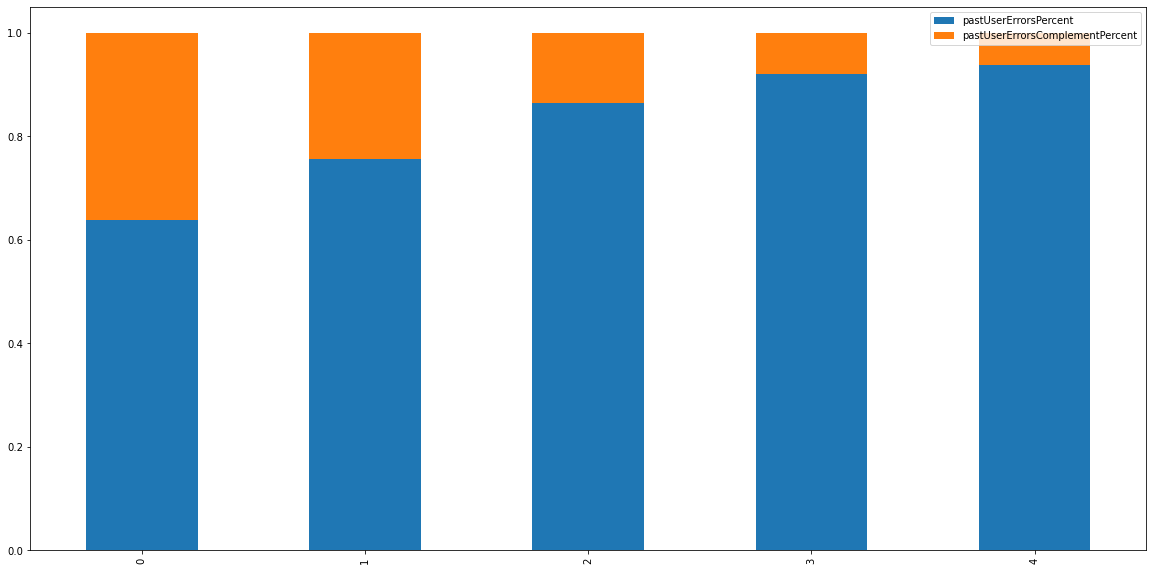

In [377]:
UserErrors[['pastUserErrorsPercent','pastUserErrorsComplementPercent']].plot.bar(stacked=True)

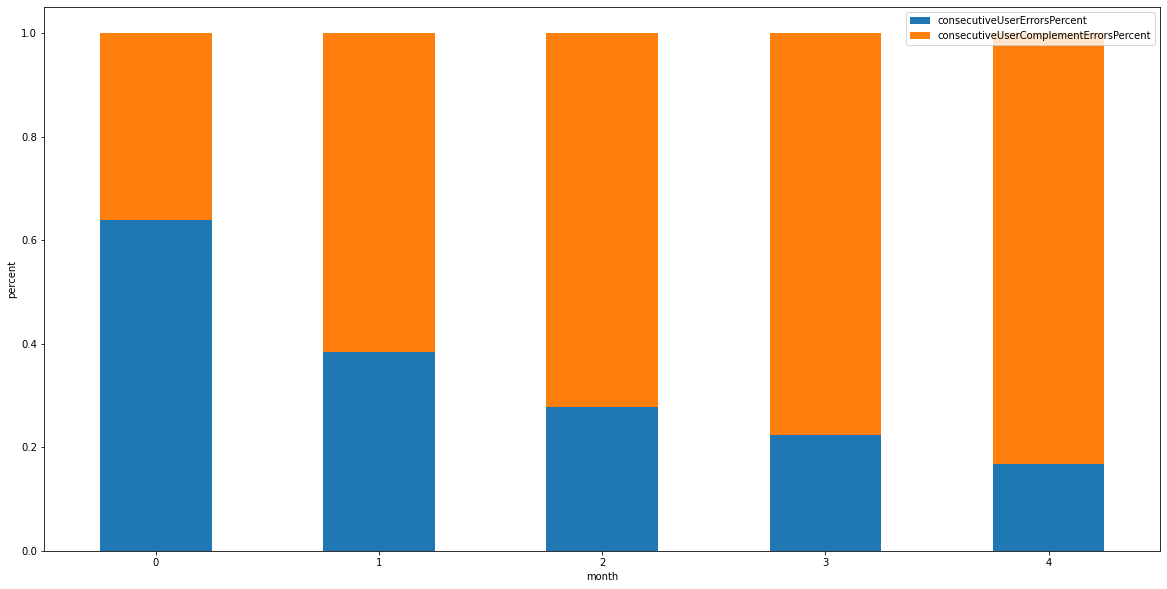

In [376]:
UserErrors[['consecutiveUserErrorsPercent','consecutiveUserComplementErrorsPercent']].plot.bar(stacked=True, rot=0)
plt.ylabel('percent')
plt.xlabel('month')
plt.show()

In [36]:
authenticationFailures = logs[logs['Result'] == 'FAILURE']

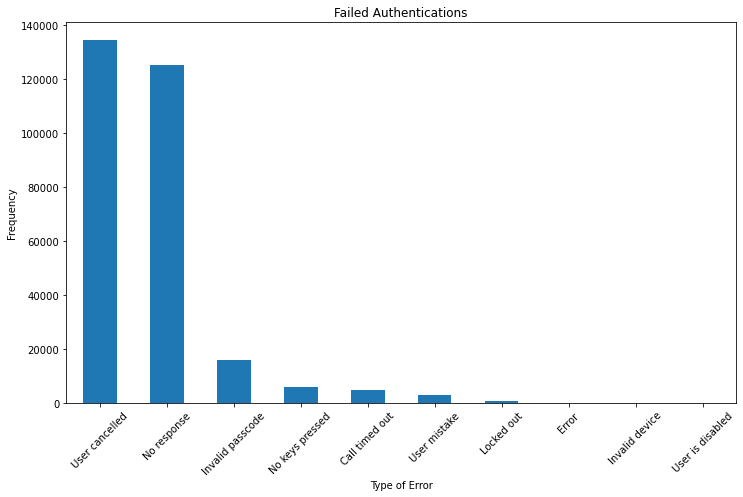

In [443]:
plt.rcParams["figure.figsize"] = (12,7)
authenticationFailures.Reason.value_counts().plot.bar()
plt.xticks(rotation= 45) 
plt.ylabel('Frequency')
plt.xlabel('Type of Error')
plt.title('Failed Authentications')
plt.show()

In [444]:
r = logs[logs['Reason']=='User cancelled']

In [448]:
r.Alias.nunique()

22863

In [449]:
r = logs[logs['Reason']=='No response']

In [450]:
r.Alias.nunique()

26400

In [483]:
userErrorRate = logs[['Alias','Result','Reason']].groupby(['Alias','Result']).size().reset_index(name='counts')

In [484]:
userQuantifiedLogs = userErrorRate.pivot(index='Alias',columns='Result',values='counts').drop(columns=['FRAUD'])

In [485]:
print(userQuantifiedLogs.columns)

Index(['FAILURE', 'SUCCESS'], dtype='object', name='Result')


In [486]:
userQuantifiedLogs.head()

Result,FAILURE,SUCCESS
Alias,,
user_000001,7.0,177.0
user_000002,2.0,498.0
user_000003,31.0,374.0
user_000004,7.0,307.0
user_000005,6.0,448.0


In [487]:
userQuantifiedLogs['FAILURE'] = userQuantifiedLogs['FAILURE'].fillna(0)

In [488]:
userQuantifiedLogs['SUCCESS'] = userQuantifiedLogs['SUCCESS'].fillna(1)

In [489]:
userQuantifiedLogs['errorRate'] = userQuantifiedLogs['FAILURE'] / userQuantifiedLogs['SUCCESS']

In [490]:
userQuantifiedLogs.sort_values(by='errorRate', inplace=True)

In [491]:
userQuantifiedLogs.insert(0,'New_ID', range(1, len(userQuantifiedLogs)+1))

In [492]:
userQuantifiedLogs.head()

Result,New_ID,FAILURE,SUCCESS,errorRate
Alias,,,,
user_045430,1,0.0,45.0,0.0
user_032306,2,0.0,146.0,0.0
user_042524,3,0.0,113.0,0.0
user_032299,4,0.0,95.0,0.0
user_014028,5,0.0,73.0,0.0


In [493]:
userQuantifiedLogs.tail()

Result,New_ID,FAILURE,SUCCESS,errorRate
Alias,,,,
user_042725,35879,11.0,2.0,5.5
user_022473,35880,6.0,1.0,6.0
user_039879,35881,7.0,1.0,7.0
user_042880,35882,9.0,1.0,9.0
user_038190,35883,94.0,5.0,18.8


In [494]:
userQuantifiedLogs['userPercentage'] = userQuantifiedLogs['New_ID'].apply(lambda num: num/len(userQuantifiedLogs))

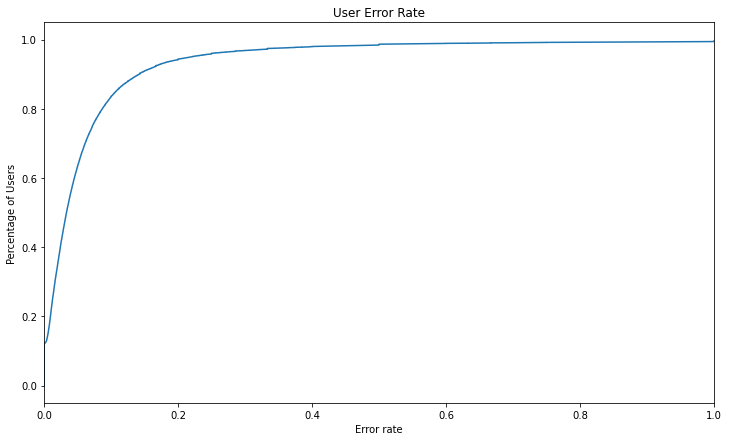

In [495]:
ax = userQuantifiedLogs.plot(x='errorRate', y='userPercentage', legend=False)
plt.ylabel('Percentage of Users')
plt.xlabel('Error rate')
plt.xlim(0,1)
plt.title('User Error Rate')
plt.show()

In [496]:
userQuantifiedLogs['errorRate'].describe()

count    35883.000000
mean         0.069894
std          0.201558
min          0.000000
25%          0.012500
50%          0.033333
75%          0.072072
max         18.800000
Name: errorRate, dtype: float64

In [55]:
authenticationFailures = logs[logs['Result'] == 'FAILURE']

In [56]:
factorLogs = logs

In [127]:
factorLogs = factorLogs[['Factor','Result','Reason']].groupby(by=['Factor','Result']).count().reset_index(level=1).pivot(columns="Result")

In [135]:
factorLogs.columns = factorLogs.columns.droplevel()

In [140]:
factorLogs.drop(columns='FRAUD', inplace=True)

In [144]:
factorLogs.fillna(0, inplace=True)

In [149]:
factorLogs['failurePercent'] = (factorLogs['FAILURE'] / (factorLogs['FAILURE'] + factorLogs['SUCCESS']))*100

In [152]:
factorLogs.drop('Bypass Status', inplace=True)

In [157]:
passCodeFailure = factorLogs.loc['Bypass Code']['FAILURE'] + factorLogs.loc['Duo Mobile Passcode']['FAILURE'] + factorLogs.loc['Hardware Token']['FAILURE'] + factorLogs.loc['Passcode']['FAILURE'] + factorLogs.loc['Yubikey Passcode']['FAILURE']

In [158]:
passCodeSucess = factorLogs.loc['Bypass Code']['SUCCESS'] + factorLogs.loc['Duo Mobile Passcode']['SUCCESS'] + factorLogs.loc['Hardware Token']['SUCCESS'] + factorLogs.loc['Passcode']['SUCCESS'] + factorLogs.loc['Yubikey Passcode']['SUCCESS']

In [161]:
factorLogs.loc['passcode'] = [passCodeFailure, passCodeSucess, (passCodeFailure/passCodeSucess)*100]

In [163]:
factorLogs.drop(['Bypass Code','Duo Mobile Passcode','Hardware Token','Passcode'], inplace=True)

In [167]:
factorLogs.drop(['Yubikey Passcode'], inplace=True)

In [173]:
factorLogs[['failurePercent']].sort_values(by='failurePercent', ascending=False)

Result,failurePercent
Factor,
passcode,5.182556
Phone Call,3.864738
Duo Push,2.926649
Remembered Device,0.000000
Security Key (WebAuthn),0.000000
Touch ID (WebAuthn),0.000000
U2F Token,0.000000


In [174]:
factorsBeingUsed = logs.reset_index()[['Factor','Description','Reason','Alias']]
factorsBeingUsed.head()

,Factor,Description,Reason,Alias
0,Phone Call,Active (Student),User approved,user_008576
1,Duo Push,Active (Student),User approved,user_049277
2,Duo Push,Active (Student),User approved,user_025756
3,Duo Push,Active (Student),User approved,user_030286
4,Duo Push,Active (Student),User approved,user_019093


In [187]:
factorUsage = factorsBeingUsed.groupby(['Description','Factor','Alias']).count().unstack(level=2).count(axis=1).reset_index()

In [188]:
def computePercentageOfGroup(row):
    if(row['Description']=='Active (Faculty)'):
        return round((row[0] / 1773) * 100, 1)
    elif(row['Description']=='Active (Staff)'):
        return round((row[0] / 1179) * 100, 1)
    elif(row['Description']=='Active (Student)'):
        return round((row[0] / 32931) * 100, 1)

In [189]:
factorUsage['percentOfPopulation'] = factorUsage.apply(lambda row: computePercentageOfGroup(row), axis=1)

In [211]:
factorUsageResult = factorUsage.set_index(['Description','Factor'])['percentOfPopulation'].unstack(level=1).transpose().fillna(0).sort_values(by='Active (Student)', ascending=False)
factorUsageResult.drop('Passcode', inplace=True)


Description,Active (Faculty),Active (Staff),Active (Student)
Factor,,,
Duo Push,72.3,68.7,87.7
Remembered Device,58.0,68.8,55.2
Phone Call,41.2,45.5,39.1
Duo Mobile Passcode,16.0,11.0,20.8
Touch ID (WebAuthn),0.2,0.2,1.1
Bypass Code,0.5,0.8,0.6
Hardware Token,14.4,28.6,0.6
Bypass Status,0.2,0.0,0.1
Security Key (WebAuthn),2.0,0.9,0.0


In [212]:
factorUsageResult

Description,Active (Faculty),Active (Staff),Active (Student)
Factor,,,
Duo Push,72.3,68.7,87.7
Remembered Device,58.0,68.8,55.2
Phone Call,41.2,45.5,39.1
Duo Mobile Passcode,16.0,11.0,20.8
Touch ID (WebAuthn),0.2,0.2,1.1
Bypass Code,0.5,0.8,0.6
Hardware Token,14.4,28.6,0.6
Bypass Status,0.2,0.0,0.1
Security Key (WebAuthn),2.0,0.9,0.0


In [424]:
factorLogs = logs[['Factor','Result','month']]

In [425]:
factorLogs = factorLogs.groupby(['month','Factor']).count().reset_index(level=1).pivot(columns='Factor',values='Result')

In [426]:
factorLogs.drop(5, inplace=True)

In [427]:
factorLogs.fillna(0, inplace=True)

In [428]:
factorLogs['Passcodes'] = factorLogs['Bypass Code'] + factorLogs['Duo Mobile Passcode'] + factorLogs['Hardware Token'] + factorLogs['Passcode'] + factorLogs['Yubikey Passcode']

In [431]:
factorLogs['Security Key'] = factorLogs['Security Key (WebAuthn)'] + factorLogs['U2F Token']

In [432]:
factorLogs.drop(columns=['Security Key (WebAuthn)','U2F Token'], inplace=True)

In [435]:
factorLogs.drop(columns=['Bypass Status'], inplace=True)

In [429]:
factorLogs.drop(columns=['Bypass Code','Duo Mobile Passcode','Hardware Token','Passcode', 'Yubikey Passcode'], inplace=True)

In [438]:
factorLogs

Factor,Duo Push,Phone Call,Remembered Device,Touch ID (WebAuthn),Passcodes,Security Key
month,,,,,,
1,573462.0,114449.0,163239.0,3065.0,48698.0,2737.0
2,685134.0,131844.0,208977.0,3627.0,55511.0,3305.0
3,605309.0,118483.0,179256.0,3285.0,48629.0,3167.0
4,687033.0,133840.0,220139.0,3700.0,51515.0,3385.0
11,690756.0,122046.0,204621.0,3403.0,65069.0,2713.0
12,527273.0,98426.0,148852.0,2684.0,48765.0,2627.0


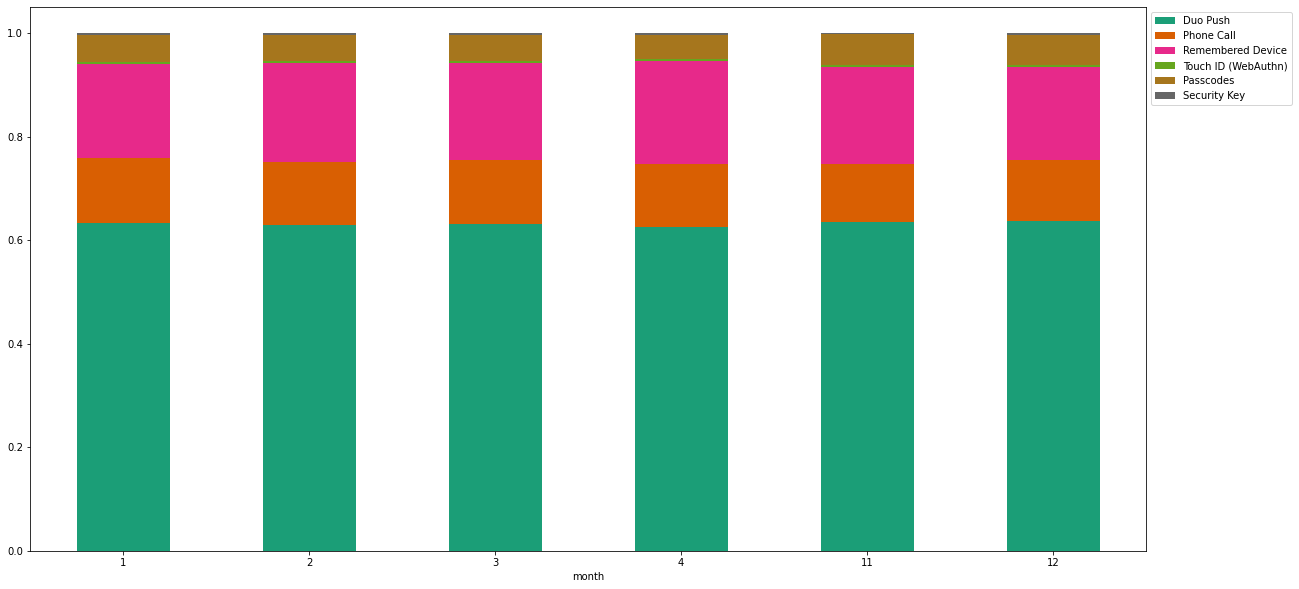

In [442]:
factorLogs.div(factorLogs.sum(axis=1), axis=0).plot.bar(stacked=True, cmap='Dark2', rot=0)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

Recovery

In [171]:
y = pd.read_csv('updatedRT.csv')

In [172]:
y['Description'] = y.user.apply(lambda alias: typeOfUsers[alias])

In [173]:
y['recovery_time'] = y['recovery_time'].astype(int)

In [174]:
y['recovery_time_in_minutes'] = y['recovery_time'].apply(lambda seconds: seconds // 60)

In [175]:
def convert(seconds):
    min, sec = divmod(seconds, 60)
    print(min, sec)
    if min != 0:
        return min
    else:
        return sec      

In [176]:
y.head()

,user,recovery_time,Description,recovery_time_in_minutes
0,user_000001,19,Active (Staff),0
1,user_000002,30067,Active (Staff),501
2,user_000003,345,Active (Staff),5
3,user_000004,5,Active (Staff),0
4,user_000005,164,Active (Staff),2


In [177]:
y.sort_values(by='recovery_time', inplace=True)

In [178]:
y.head()

,user,recovery_time,Description,recovery_time_in_minutes
31124,user_046676,0,Active (Student),0
4974,user_007729,0,Active (Student),0
29216,user_044532,0,Active (Student),0
29210,user_044525,0,Active (Student),0
29206,user_044521,0,Active (Student),0


In [179]:
y.insert(0,'New_ID', range(1, len(y)+1))

In [180]:
y['userPercentage'] = y['New_ID'].apply(lambda num: num/len(y))

In [184]:
y['normalized_recovery_time'] = y['recovery_time'] / 11595074

In [185]:
y.head()

,New_ID,user,recovery_time,Description,recovery_time_in_minutes,userPercentage,normalized_recovery_time
31124,1,user_046676,0,Active (Student),0,0.000028,0.0
4974,2,user_007729,0,Active (Student),0,0.000056,0.0
29216,3,user_044532,0,Active (Student),0,0.000084,0.0
29210,4,user_044525,0,Active (Student),0,0.000111,0.0
29206,5,user_044521,0,Active (Student),0,0.000139,0.0


In [190]:
y['recovery_time'].mean()

31246.670763314105

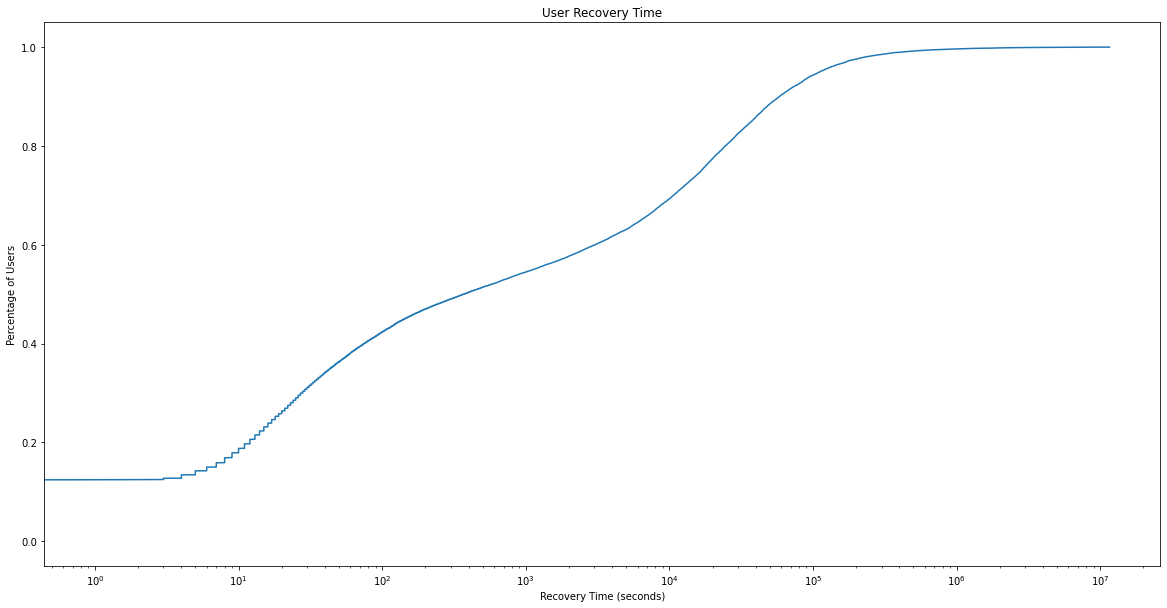

In [394]:
plt.rcParams["figure.figsize"] = (20,10)
ax = y.plot(x='recovery_time', y='userPercentage', legend=False)
plt.ylabel('Percentage of Users')
plt.xlabel('Recovery Time (seconds)')

ax.set_xscale('log')

plt.title('User Recovery Time')
plt.show()

In [409]:
y['recovery_time'].describe().apply(lambda x: format(x, 'f'))

count       35883.000000
mean        31246.670763
std        204293.737039
min             0.000000
25%            18.000000
50%           369.000000
75%         16691.000000
max      11595074.000000
Name: recovery_time, dtype: object